Feature Engineering 1.1.1

In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset
import  matplotlib.pyplot as plt
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [2]:
txn = pd.read_csv('Retail_Data_Transactions.csv')

In [3]:
txn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
len(txn)

125000

Ans1.1.1: Number of rows is 125000

Q1.1.2

In [5]:
date = pd.to_datetime(txn['trans_date'])
txn['txn_date'] = date
txn.drop(columns=['trans_date'], inplace = True)
txn

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


Q1.1.3

In [6]:
print('min of txn_date is',txn['txn_date'].min())
print('max of txn_date is',txn['txn_date'].max())

min of txn_date is 2011-05-16 00:00:00
max of txn_date is 2015-03-16 00:00:00


Q1.1.4

In [7]:
txn['ME_DT']=txn['txn_date'] + pd.offsets.MonthEnd(n=0)
txn

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30
...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30
124996,CS7232,38,2014-08-19,2014-08-31
124997,CS8731,42,2014-11-28,2014-11-30
124998,CS8133,13,2013-12-14,2013-12-31


Q1.1.5

The following slice of dataframe is the same as provided.

In [8]:
txn['YEAR']=txn['txn_date'].dt.year
txn.iloc[55:60,:]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


Create features that capture annual spending 1.2.1

In [9]:
clnt_annual_aggregations = txn.groupby(['customer_id','YEAR']).agg(ann_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),
                                                                  ann_txn_amt_ave = pd.NamedAgg('tran_amount','mean'),
                                                                  ann_txn_amt_std = pd.NamedAgg('tran_amount','std'),
                                                                  ann_txn_amt_var = pd.NamedAgg('tran_amount','var'),
                                                                  ann_txn_amt_sem = pd.NamedAgg('tran_amount','sem'),
                                                                  ann_txn_amt_max = pd.NamedAgg('tran_amount','max'),
                                                                  ann_txn_amt_min = pd.NamedAgg('tran_amount','min'),
                                                                  ann_txn_amt_cnt = pd.NamedAgg('tran_amount','count'))

In [10]:
clnt_annual_aggregations

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1  
...                           ...              ...  
CS9000      2011               16                2  
            2012               37                4  
            2013               71                2  
            2014               16                4  
            2015               34                1  

[31140 rows x 8 columns]

Q1.2.2

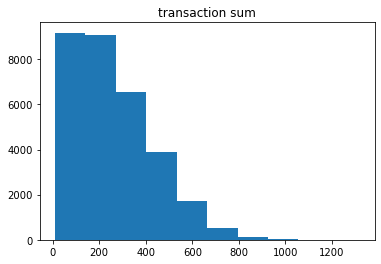

In [11]:
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'])
plt.title('transaction sum')
plt.show()

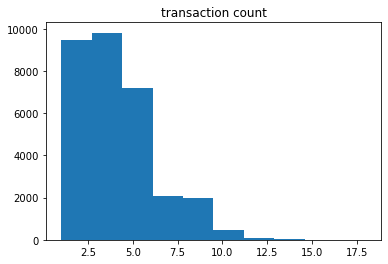

In [12]:
plt.hist(clnt_annual_aggregations['ann_txn_amt_cnt'])
plt.title('transaction count')
plt.show()

Q1.2.3

In [13]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot_table(columns=['YEAR'],index=['customer_id'],fill_value=0)

In [14]:
clnt_annual_aggregations_pivot

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000   0.000000   
CS8997            45.000000  39.500000  35.166667  42.000000   0.000000   
CS8998            64.000000  54.400000  47.000000  32.500000   0.000000   
CS8999            52.000000  25.250000  28.000000  21.000000   0.000000   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum       \
YEAR                   2011 2012 2013 2014 2015  ...            2011 2012   
customer_id                                      ...                        
CS1112                    3    5    3    3    1  ...             212  337   
CS1113                    3    5    5    4    3  ...             244  374   
CS1114                    5    2    5    6    1  ...             426  150   
CS1115                    3    7    7    4    1  ...             261  473   
CS1116                    4    3    1    5    0  ...             235  230   
...                     ...  ...  ...  ...  ...  ...             ...  ...   
CS8996                    2    3    2    6    0  ...              62  101   
CS8997                    2    4    6    2    0  ...              90  158   
CS8998                    2    5    2    4    0  ...             128  272   
CS8999                    3    4    3    2    0  ...             156  101   
CS9000                    2    4    2    4    1  ...              39  216   

                           ann_txn_amt_var                           \
YEAR        2013 2014 2015            2011        2012         2013   
customer_id                                                           
CS1112       212  212   39      485.333333  161.800000  1190.333333   
CS1113       426  226  220      444.333333  290.200000   171.200000   
CS1114       352  425   79       94.700000  968.000000   619.300000   
CS1115       557  313   55      225.000000  477.285714   110.952381   
CS1116        59  333    0      449.583333  908.333333     0.000000   
...          ...  ...  ...             ...         ...          ...   
CS8996        83  336    0       98.000000   20.333333   144.500000   
CS8997       211   84    0        8.000000   45.666667   441.366667   
CS8998        94  130    0       50.000000  505.300000  1568.000000   
CS8999        84   42    0      333.000000   21.583333   103.000000   
CS9000       147   97   34       24.500000  281.333333    12.500000   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333    0.000000  
CS1113       781.666667  745.333333  
CS1114       726.166667    0.000000  
CS1115       512.250000    0.000000  
CS1116       636.800000    0.000000  
...                 ...         ...  
CS8996       481.600000    0.000000  
CS8997        18.000000    0.000000  
CS8998       219.666667    0.000000  
CS8999        18.000000    0.000000  
CS9000        68.250000    0.000000  

[6889 rows x 40 columns]

There are 40 columns becasuse we want to show one entry for each customer, for each costomer id, we want to know their (sum, mean, std, var, sem, max, min, count) of transaction for 5 years, so there are 5 * 8 = 40 entries for each customer, therefore 40 columns.

I choose fill_value=0 for NAN values, which means that for any years that the customer don't have transactions, or they are not yet registered for their id, we put 0 under transaction because they don't purchase anything.

Q1.2.4


In [15]:
print(clnt_annual_aggregations_pivot.columns.nlevels)
print(clnt_annual_aggregations_pivot.columns)

2
MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_a

The first line of code tells us that there are 2 levels in our table, which are aggregated transaction and year. 

The second code shows titles of all entries/columns, there are totally 40 tuples, which match our answer from last part. All titles are tuple with 2 elements, which is consistent with number of levels.

Q1.2.5

In [16]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0). astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1). astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

In [17]:
clnt_annual_aggregations_pivot

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,1,...,212,337,212,212,39,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,3,...,244,374,426,226,220,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,1,...,426,150,352,425,79,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,1,...,261,473,557,313,55,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,0,...,235,230,59,333,0,449.583333,908.333333,0.000000,636.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,0,...,62,101,83,336,0,98.000000,20.333333,144.500000,481.600000,0.000000
CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,0,...,90,158,211,84,0,8.000000,45.666667,441.366667,18.000000,0.000000
CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,0,...,128,272,94,130,0,50.000000,505.300000,1568.000000,219.666667,0.000000


The first line of code extract all the first level index names into variable 'level_0', there are totally 40 of them as we discussed. It is also the first element in each tuple in 'clnt_annual_aggregations_pivot.columns'.

The second line of code extract all the second level index names into variable 'level_1', there are totally 40 of them. It is also the second element in each tuple in 'clnt_annual_aggregations_pivot.columns'.

The third line combine string from first and second level and assign back to colomns of pivot table, so we result in one level of column names, putting together the information of aggregated values and YEAR.

In [18]:
# save table to excel file.
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

Q1.2.6

Firstly, some customers may not registered in the system for some period of time, but we don't know the specific time that they have transactions, so the annual aggregated mean and count data may be misleading since they may not be purchasing for most of the time.

Secondly, we lost many information when we aggregated data into years, we may want to find peak season for sales, or how transaction number and amount fluctuated along the year, but the aggreegated annual data fails to do so.

Third, some columns may be useless, we may not want to count transaction amount for each customer in each year, the sample (single customer) is too small, and it doesn't tell us much information.

Forth, there are redundent information like standard deviation and variance, they have perfect quadratic relationship, they can cause multicolliearity in regression analysis.

Create monthly aggregations 1.3 

part1.3.1

In [19]:
clnt_monthly_aggregations = txn.groupby(['customer_id','ME_DT']).agg(mth_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),
                                                                  mth_txn_cnt = pd.NamedAgg('tran_amount','count'))
clnt_monthly_aggregations.loc['CS1112']

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


part1.3.2

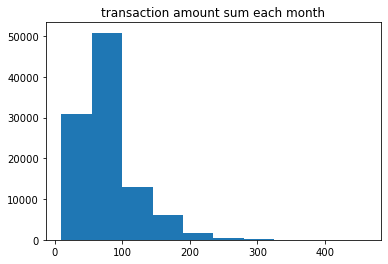

The most common transaction amount is: 77
The maximum transaction amount is: 460


In [20]:
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
plt.title('transaction amount sum each month')
plt.show()
print('The most common transaction amount is:',clnt_monthly_aggregations['mth_txn_amt_sum'].mode()[0])
print('The maximum transaction amount is:',clnt_monthly_aggregations['mth_txn_amt_sum'].max())

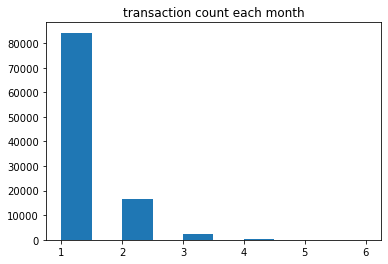

In [21]:
plt.hist(clnt_monthly_aggregations['mth_txn_cnt'])
plt.title('transaction count each month')
plt.show()

In [22]:
print('The most common transaction amount is:',clnt_monthly_aggregations['mth_txn_cnt'].mode()[0])
print('The maximum transaction count is:',clnt_monthly_aggregations['mth_txn_cnt'].max())

The most common transaction amount is: 1
The maximum transaction count is: 6


Observation: from the above two histogram, we can see that most commonly customers have transaction amount of 50-100 per month, the most common transaction count per month for each customers is 1.

Both monthly and annual plot are right skewed, which means that small amount and count of transaction is most common both monthly and annually. It is partially because clinents may only shop in this store in some particular month/year, which results in many 0 transaction fields.

Create the base table for the rolling window features 1.4

part1.4.1

In [23]:
print('number of unique clients:',len(txn.loc[:,'customer_id'].unique()))
print('number of unique month-end-dates:',len(txn.loc[:,'ME_DT'].unique()))

number of unique clients: 6889
number of unique month-end-dates: 47


part1.4.2

In [24]:
from itertools import product 
clnt_no = txn.loc[:,'customer_id'].unique()
me_dt = txn.loc[:,'ME_DT'].unique()
base_table = product(clnt_no , me_dt)
type(base_table)

itertools.product

part1.4.3

In [25]:
base_table_pd = pd.DataFrame.from_records(base_table)
base_table_pd.columns=['CLNT_NO', 'ME_DT']
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2011-08-31
323779,CS8077,2012-09-30
323780,CS8077,2014-09-30
323781,CS8077,2014-02-28


part1.4.4

In [26]:
base_1112 = base_table_pd.loc[base_table_pd['CLNT_NO']=='CS1112']
base_1112

,CLNT_NO,ME_DT
157027,CS1112,2013-02-28
157028,CS1112,2015-03-31
157029,CS1112,2011-11-30
157030,CS1112,2013-11-30
157031,CS1112,2014-03-31
157032,CS1112,2012-02-29
157033,CS1112,2015-01-31
157034,CS1112,2013-01-31
157035,CS1112,2013-08-31
157036,CS1112,2013-07-31


In [27]:
# confirm that the dates fall between the min and max month-dates you identified in section 1.1.
# check if all dates bigger than min
print('All dates bigger than min:',len((base_1112.loc[:,'ME_DT'] > txn['txn_date'].min())==True)==len(base_1112.loc[:,'ME_DT']))
print('All dates smaller than max:',len((base_1112.loc[:,'ME_DT'] < txn['txn_date'].max())==True)==len(base_1112.loc[:,'ME_DT']))

# confirm that the snapshot of client CS1112 has 47 rows
print('Snapshot if CS1112 has 47 rows:',len(base_1112)==47)

# Confirm that the base table pd has 323,783 rows
print('Base table has 323,783 rows:',len(base_table_pd)==323783)

All dates bigger than min: True
All dates smaller than max: True
Snapshot if CS1112 has 47 rows: True
Base table has 323,783 rows: True


Create the monthly rolling window features 1.5

part1.5.1

In [28]:
base_clnt_mth = base_table_pd.join(clnt_monthly_aggregations, how='left', on=['CLNT_NO','ME_DT'])
# base_clnt_mth = clnt_monthly_aggregations.join(base_table_pd, how='left', on=['CLNT_NO','ME_DT'])
base_clnt_mth = base_clnt_mth.fillna(0)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,0.0,0.0
323780,CS8077,2014-09-30,0.0,0.0
323781,CS8077,2014-02-28,0.0,0.0


Why do some rows have NaN values?

Here in the rows, we have all the combination of month and cliend number, but clients does not have purchase history in some months, which results in NAN value in that rows.

What values will you choose to impute NaN values in the sum and count columns?
Perform the imputation you suggest.

I would choose to impute 0 in the sum and count columns, since 'NAN' is caused by no purchase history of the client in the month, therefore the monthly amount transaction and transaction count is 0 in this case.

Confirm that the number of rows is what you expect. What is the value?

The number of rows in base_clnt_mth should be equal to number of rows in base_table_pd, which contains all the combinations of client & month.

In [29]:
# Confirm that the number of rows is what you expect. What is the value?
print('number of rows is what we expect:',len(base_table_pd)==len(base_clnt_mth))

number of rows is what we expect: True


How are tables base clnt mth and clnt monthly aggregations different? Comment on the number of rows and the content of each table.

base_clnt_mth has more rows, because base_clnt_mth contains all the clients & month combinations, clnt_monthly_aggregations contains only the clients & month combinations that the particular clients have purchase record.

clnt_monthly_aggregations has multi-index, which are client number and month, base_clnt_mth has only one index, which is the row number.

In [30]:
print(clnt_monthly_aggregations.index.nlevels)
print(clnt_monthly_aggregations.index)

2
MultiIndex([('CS1112', '2011-06-30'),
            ('CS1112', '2011-08-31'),
            ('CS1112', '2011-10-31'),
            ('CS1112', '2012-04-30'),
            ('CS1112', '2012-06-30'),
            ('CS1112', '2012-07-31'),
            ('CS1112', '2012-09-30'),
            ('CS1112', '2012-12-31'),
            ('CS1112', '2013-03-31'),
            ('CS1112', '2013-07-31'),
            ...
            ('CS9000', '2012-05-31'),
            ('CS9000', '2012-06-30'),
            ('CS9000', '2012-12-31'),
            ('CS9000', '2013-07-31'),
            ('CS9000', '2013-10-31'),
            ('CS9000', '2014-01-31'),
            ('CS9000', '2014-05-31'),
            ('CS9000', '2014-07-31'),
            ('CS9000', '2014-08-31'),
            ('CS9000', '2015-02-28')],
           names=['customer_id', 'ME_DT'], length=103234)


In [31]:
print(base_clnt_mth.index.nlevels)
print(base_clnt_mth.index)

1
RangeIndex(start=0, stop=323783, step=1)


part1.5.2

In [32]:
base_clnt_mth = base_clnt_mth.sort_values(by=['CLNT_NO', 'ME_DT'],ascending=True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,34.0,1.0


part1.5.3

In [33]:
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO'])['mth_txn_amt_sum','mth_txn_cnt'].rolling(3).agg(['sum','mean','max'])
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO'])['mth_txn_amt_sum','mth_txn_cnt'].rolling(6).agg(['sum','mean','max'])
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO'])['mth_txn_amt_sum','mth_txn_cnt'].rolling(12).agg(['sum','mean','max'])

/var/folders/7z/6tf98rc93hs5zf3rfz6g5_zm0000gn/T/ipykernel_56566/1838174764.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO'])['mth_txn_amt_sum','mth_txn_cnt'].rolling(3).agg(['sum','mean','max'])
/var/folders/7z/6tf98rc93hs5zf3rfz6g5_zm0000gn/T/ipykernel_56566/1838174764.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO'])['mth_txn_amt_sum','mth_txn_cnt'].rolling(6).agg(['sum','mean','max'])
/var/folders/7z/6tf98rc93hs5zf3rfz6g5_zm0000gn/T/ipykernel_56566/1838174764.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO'])['mth_txn_amt_sum','mth_txn_cnt'].rolling(12).agg(['sum','mean

In [34]:
rolling_features_6M.head()

mth_txn_amt_sum          mth_txn_cnt         
                           sum mean max         sum mean max
CLNT_NO                                                     
CS1112  157064             NaN  NaN NaN         NaN  NaN NaN
        157058             NaN  NaN NaN         NaN  NaN NaN
        157044             NaN  NaN NaN         NaN  NaN NaN
        157069             NaN  NaN NaN         NaN  NaN NaN
        157060             NaN  NaN NaN         NaN  NaN NaN

How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? 
Why do they appear?

For 3M, 6M, 12M table, there are 2, 5, 11 NAN values at the biginning. For rowing window of size n, we need the last n points to calculate the statistical property, therefore we would result in n-1 rows of emptly value.

How many levels do the index and columns have? Are these MultiIndex dataframes?

These are multiIndex dataframes, with 2 levels of index: client number & row number. They also have 2 levels of columns: first is for amount sum/tramsaction count, second is for aggregated value, sum/mean/max. 

In [35]:
# How many levels do the index and columns have? Are these MultiIndex dataframes?
print(rolling_features_3M.index.nlevels)
print(rolling_features_3M.index)
print(rolling_features_3M.columns.nlevels)
print(rolling_features_3M.columns)

2
MultiIndex([('CS1112', 157064),
            ('CS1112', 157058),
            ('CS1112', 157044),
            ('CS1112', 157069),
            ('CS1112', 157060),
            ('CS1112', 157048),
            ('CS1112', 157029),
            ('CS1112', 157049),
            ('CS1112', 157046),
            ('CS1112', 157032),
            ...
            ('CS9000', 295143),
            ('CS9000', 295129),
            ('CS9000', 295145),
            ('CS9000', 295157),
            ('CS9000', 295152),
            ('CS9000', 295140),
            ('CS9000', 295126),
            ('CS9000', 295119),
            ('CS9000', 295136),
            ('CS9000', 295114)],
           names=['CLNT_NO', None], length=323783)
2
MultiIndex([('mth_txn_amt_sum',  'sum'),
            ('mth_txn_amt_sum', 'mean'),
            ('mth_txn_amt_sum',  'max'),
            (    'mth_txn_cnt',  'sum'),
            (    'mth_txn_cnt', 'mean'),
            (    'mth_txn_cnt',  'max')],
           )


In [36]:
# Rename the columns
rolling_features_3M.columns = ['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']
rolling_features_6M.columns = ['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']
rolling_features_12M.columns = ['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']
rolling_features_3M
# rolling_features_3M.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

amt_sum_3M  amt_mean_3M  amt_max_3M  txn_cnt_sum_3M  \
CLNT_NO                                                               
CS1112  157064         NaN          NaN         NaN             NaN   
        157058         NaN          NaN         NaN             NaN   
        157044        56.0    18.666667        56.0             1.0   
        157069       152.0    50.666667        96.0             2.0   
        157060        96.0    32.000000        96.0             1.0   
...                    ...          ...         ...             ...   
CS9000  295140         0.0     0.000000         0.0             0.0   
        295126         0.0     0.000000         0.0             0.0   
        295119         0.0     0.000000         0.0             0.0   
        295136        34.0    11.333333        34.0             1.0   
        295114        34.0    11.333333        34.0             1.0   

                txn_cnt_mean_3M  txn_cnt_max_3M  
CLNT_NO                                          
CS1112  157064              NaN             NaN  
        157058              NaN             NaN  
        157044         0.333333             1.0  
        157069         0.666667             1.0  
        157060         0.333333             1.0  
...                         ...             ...  
CS9000  295140         0.000000             0.0  
        295126         0.000000             0.0  
        295119         0.000000             0.0  
        295136         0.333333             1.0  
        295114         0.333333             1.0  

[323783 rows x 6 columns]

part1.5.4

In [37]:
# drop the level:0 of the rolling features MultiIndex table
rolling_features_3M.index=rolling_features_3M.index.droplevel(0)
rolling_features_6M.index=rolling_features_6M.index.droplevel(0)
rolling_features_12M.index=rolling_features_12M.index.droplevel(0)
rolling_features_3M

,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M
157064,NaN,NaN,NaN,NaN,NaN,NaN
157058,NaN,NaN,NaN,NaN,NaN,NaN
157044,56.0,18.666667,56.0,1.0,0.333333,1.0
157069,152.0,50.666667,96.0,2.0,0.666667,1.0
157060,96.0,32.000000,96.0,1.0,0.333333,1.0
...,...,...,...,...,...,...
295140,0.0,0.000000,0.0,0.0,0.000000,0.0
295126,0.0,0.000000,0.0,0.0,0.000000,0.0
295119,0.0,0.000000,0.0,0.0,0.000000,0.0
295136,34.0,11.333333,34.0,1.0,0.333333,1.0


In [38]:
# join with base clnt mth on the indexes
all_rolling_features = base_clnt_mth.join(rolling_features_3M)
all_rolling_features = all_rolling_features.join(rolling_features_6M)
all_rolling_features = all_rolling_features.join(rolling_features_12M)
all_rolling_features

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295126,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295119,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
295136,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


Make sure you understand why joining on the indexes preserves the CLNT NO and ME DT for each index.

The 3 rolling features are calculated directly from base_clnt_mth, while performing rolling window does not change the relative row order, so all the index can match back to their client number and month.

part1.5.5

In [39]:
# Confirm that your final output all rolling features has 323,783 rows and 22 columns 
print('final rolling feature output has 323,783 rows:', len(all_rolling_features)==323783)
print('final rolling feature output has 22 columns:', len(all_rolling_features.iloc[0,:])==22)

# save it as mth rolling features.xlsx.
all_rolling_features.to_excel("mth_rolling_features.xlsx")

final rolling feature output has 323,783 rows: True
final rolling feature output has 22 columns: True


Date-related features: date of the week 1.6

part1.6.1

In [40]:
txn['day_of_the_week']=txn['txn_date'].dt.dayofweek
txn['day_name']=txn['txn_date'].dt.day_name()
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


part1.6.2

<AxesSubplot:xlabel='day_name'>

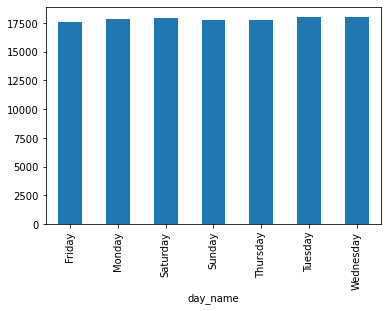

In [41]:
txn.groupby('day_name')['tran_amount'].count().plot.bar()

part1.6.3

In [42]:
temp = pd.DataFrame(txn.groupby(['customer_id', 'day_name', 'YEAR'])['tran_amount'].count())
temp.columns = ["cnt"]
temp

cnt
customer_id day_name  YEAR     
CS1112      Friday    2011    1
                      2013    1
            Monday    2013    1
            Saturday  2012    1
            Sunday    2011    1
...                         ...
CS9000      Thursday  2014    1
            Tuesday   2012    1
                      2013    1
                      2014    1
            Wednesday 2012    1

[93736 rows x 1 columns]

part1.6.3

In [43]:
tran_day = temp.pivot_table(columns=['YEAR','day_name'],index=['customer_id'],fill_value=0,)
tran_day

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996           0      1        0      0        0       1         0      0   
CS8997           0      0        0      0        1       0         1      1   
CS8998           0      0        0      0        0       1         1      2   
CS8999           0      1        1      0        0       1         0      1   
CS9000           0      0        0      2        0       0         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996           0        3  ...        1       1         2      0      0   
CS8997           2        0  ...        0       0         0      0      0   
CS8998           0        0  ...        0       1         1      0      0   
CS8999           0        2  ...        0       0         2      0      0   
CS9000           0        1  ...        1       1         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  
...              ...    ...      ...     ...       ...  
CS8996             0      0        0       0         0  
CS8997             0      0        0       0         0  
CS8998             0      0        0       0         0  
CS8999             0      0        0       0         0  
CS9000             1      0        0       0         0  

[6889 rows x 35 columns]

In [44]:
print(tran_day.columns.nlevels)

3


In [45]:
level_0 = tran_day.columns.get_level_values(0). astype(str)
level_1 = tran_day.columns.get_level_values(1). astype(str)
level_2 = tran_day.columns.get_level_values(2). astype(str)
tran_day.columns = level_0 + '_' + level_1 + '_' + level_2
tran_day

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,...,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,...,0,1,1,0,0,0,0,0,0,0


part1.6.4

In [46]:
# Confirm that your output has the same number of rows as the final output in section 1.2
print('output in 1.6 has same number of rows as output in 1.2:', len(clnt_annual_aggregations_pivot) == len(tran_day))
# save it as annual day of week counts pivot.xlsx
tran_day.to_excel("annual_day_of_week_counts_pivot.xlsx")
print('In this section, I created',len(tran_day.iloc[0,:]),'columns.')

output in 1.6 has same number of rows as output in 1.2: True
In this section, I created 35 columns.


part1.6.5

In [47]:
temp = pd.DataFrame(txn.groupby(['customer_id', 'ME_DT','day_name'])['tran_amount'].count())
temp.columns = ["cnt"]
temp

cnt
customer_id ME_DT      day_name      
CS1112      2011-06-30 Wednesday    1
            2011-08-31 Friday       1
            2011-10-31 Sunday       1
            2012-04-30 Sunday       1
            2012-06-30 Sunday       1
...                               ...
CS9000      2014-01-31 Sunday       1
            2014-05-31 Thursday     1
            2014-07-31 Tuesday      1
            2014-08-31 Sunday       1
            2015-02-28 Saturday     1

[121512 rows x 1 columns]

In [48]:
tran_medt = temp.pivot_table(columns=['day_name'],index=['customer_id','ME_DT'],fill_value=0,)
tran_medt

cnt                                          \
day_name               Friday Monday Saturday Sunday Thursday Tuesday   
customer_id ME_DT                                                       
CS1112      2011-06-30      0      0        0      0        0       0   
            2011-08-31      1      0        0      0        0       0   
            2011-10-31      0      0        0      1        0       0   
            2012-04-30      0      0        0      1        0       0   
            2012-06-30      0      0        0      1        0       0   
...                       ...    ...      ...    ...      ...     ...   
CS9000      2014-01-31      0      0        0      1        0       0   
            2014-05-31      0      0        0      0        1       0   
            2014-07-31      0      0        0      0        0       1   
            2014-08-31      0      0        0      1        0       0   
            2015-02-28      0      0        1      0        0       0   

                                  
day_name               Wednesday  
customer_id ME_DT                 
CS1112      2011-06-30         1  
            2011-08-31         0  
            2011-10-31         0  
            2012-04-30         0  
            2012-06-30         0  
...                          ...  
CS9000      2014-01-31         0  
            2014-05-31         0  
            2014-07-31         0  
            2014-08-31         0  
            2015-02-28         0  

[103234 rows x 7 columns]

In [49]:
level_0 = tran_medt.columns.get_level_values(0). astype(str)
level_1 = tran_medt.columns.get_level_values(1). astype(str)

tran_medt.columns = level_0 + '_' + level_1
tran_medt.head()

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0

part1.6.6

In [50]:
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2011-08-31
323779,CS8077,2012-09-30
323780,CS8077,2014-09-30
323781,CS8077,2014-02-28


In [51]:
mth_day_counts = base_table_pd.join(tran_medt,how='left', on=['CLNT_NO','ME_DT'])
mth_day_counts = mth_day_counts.fillna(0)
# Save the final output as mth day counts.xlxs.
mth_day_counts.to_excel("mth_day_counts.xlsx")

Date-related features: days since last transaction 1.7

In [52]:
last_monthly_purchase = txn.groupby(['customer_id','ME_DT']).agg(last_monthly_purchase = pd.NamedAgg('txn_date','max'))

last_monthly_purchase

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24
...                                      ...
CS9000      2014-01-31            2014-01-12
            2014-05-31            2014-05-08
            2014-07-31            2014-07-08
            2014-08-31            2014-08-24
            2015-02-28            2015-02-28

[103234 rows x 1 columns]

part1.7.2

In [53]:
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase,how='left', on=['CLNT_NO','ME_DT'])
last_monthly_purchase_base = last_monthly_purchase_base.sort_values(by=['CLNT_NO', 'ME_DT'],ascending=True)
last_monthly_purchase_base.head(8)

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT
157048,CS1112,2011-10-31,2011-10-02
157029,CS1112,2011-11-30,NaT
157049,CS1112,2011-12-31,NaT


In this part, we want to calculate 'days since last transaction', the NaT value happens because we don't have any transaction of a client in some particular month. In this case, if we want to calculate days since last transaction, we can impute the last available value from previous rows, to indicate the last transaction.

part1.7.3

In [54]:
last_monthly_purchase_base = last_monthly_purchase_base.groupby('CLNT_NO').apply(lambda x: x.ffill())
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,2011-06-15
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,2011-08-19
...,...,...,...
295140,CS9000,2014-11-30,2014-08-24
295126,CS9000,2014-12-31,2014-08-24
295119,CS9000,2015-01-31,2014-08-24
295136,CS9000,2015-02-28,2015-02-28


In [55]:
# slice the rows in instruction
last_monthly_purchase_base.loc[[160011,159989,101134,101128,101114]]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14


part1.7.4

In [56]:
delta =  (last_monthly_purchase_base.ME_DT - last_monthly_purchase_base.last_monthly_purchase).dt.days
last_monthly_purchase_base['days_since_last_txn'] = delta.values
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


part1.7.5

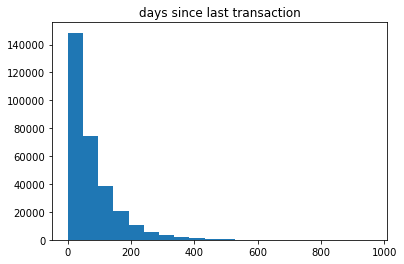

In [57]:
plt.hist(last_monthly_purchase_base['days_since_last_txn'],bins=20)
plt.title('days since last transaction')
plt.show()

I would impute the NAN value to -1. Since there are no previous transaction, we cannot get a value by substracting date value. While it doesn't make sence to fill a positive or 0 value to NAN because it would indicate an interval to previous transaction. Therefore I would fill a negative value to distinguish that there's no previous transaction.

In [58]:
last_monthly_purchase_base['days_since_last_txn'] = last_monthly_purchase_base['days_since_last_txn'].fillna(-1)

In [59]:
days_since_last_txn = last_monthly_purchase_base[['CLNT_NO','ME_DT','days_since_last_txn']]
days_since_last_txn

,CLNT_NO,ME_DT,days_since_last_txn
157064,CS1112,2011-05-31,-1.0
157058,CS1112,2011-06-30,15.0
157044,CS1112,2011-07-31,46.0
157069,CS1112,2011-08-31,12.0
157060,CS1112,2011-09-30,42.0
...,...,...,...
295140,CS9000,2014-11-30,98.0
295126,CS9000,2014-12-31,129.0
295119,CS9000,2015-01-31,160.0
295136,CS9000,2015-02-28,0.0


In [60]:
days_since_last_txn.to_excel("days_since_last_txn.xlsx")